In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import numpy as np
import pylab as plt

import localpaths
import subimage
import lisa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
si = lisa.parse_annotations('~/Data/LISA/allAnnotations.csv', lisa.LISA_17_CLASS_MAP)

['aiua120214-0', 'aiua120214-1', 'aiua120214-2', 'aiua120306-0', 'aiua120306-1', 'vid0', 'vid1', 'vid10', 'vid11', 'vid2', 'vid3', 'vid4', 'vid5', 'vid6', 'vid7', 'vid8', 'vid9']


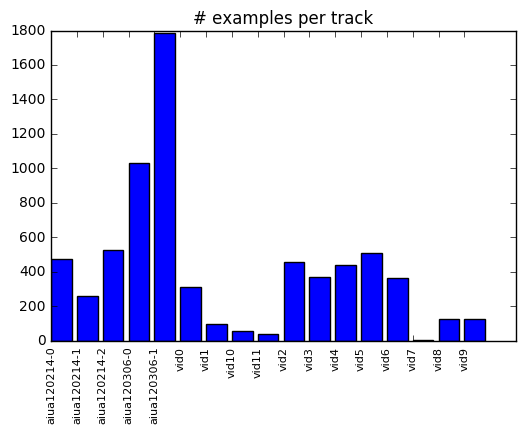

In [9]:
# Take a look at class representation across the various data cuts
all_tracks = list({x : 0 for x in si._gid}.keys())
all_tracks.sort()
print(all_tracks)

y_all = np.array(si._y)
examples_per_track = np.zeros((len(all_tracks),))

for ii, track_id in enumerate(all_tracks):
    idx = [x for x in range(len(si._y)) if si._gid[x] == track_id]
    idx = np.array(idx, dtype=np.int32)
    y_vals = y_all[idx]
    
    examples_per_track[ii] = y_vals.size

    
plt.figure()
plt.bar(range(len(all_tracks)), examples_per_track)
plt.gca().set_xticks(np.arange(len(all_tracks)))
plt.gca().set_xticklabels(all_tracks, rotation='vertical', fontsize=8)
plt.title('# examples per track')
plt.show()

(3613,) (4687,)
(2111,) (2279,)
# train, # test: 3613 2111


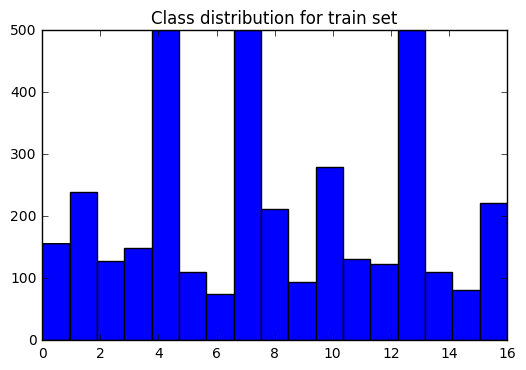

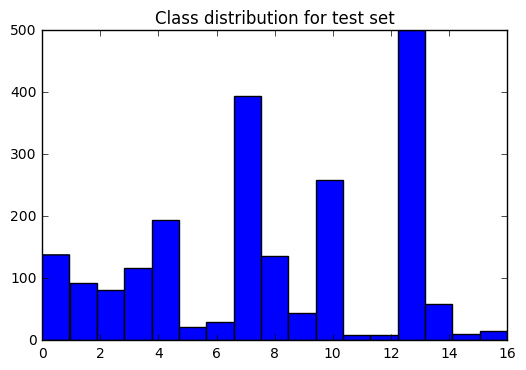

In [26]:
train_idx, test_idx = lisa.default_train_test_split(si, max_per_class=500)

print('# train, # test:', len(train_idx), len(test_idx))

#
# overall distribution of examples in train/test
#
plt.figure()
plt.hist(y_all[train_idx], np.max(y_all)+1)
plt.title('Class distribution for train set')

plt.figure()
plt.hist(y_all[test_idx], np.max(y_all)+1)
plt.title('Class distribution for test set')

plt.show()

In [27]:
# Load the images: this is a little slow...
tic = time.time()
x_train, y_train = si.get_subimages(train_idx, verbose=True)
x_test, y_test = si.get_subimages(test_idx, verbose=True)
print(time.time() - tic, ' seconds to load images')

loading image 0 (of 3613)
loading image 500 (of 3613)
loading image 1000 (of 3613)
loading image 1500 (of 3613)
loading image 2000 (of 3613)
loading image 2500 (of 3613)
loading image 3000 (of 3613)
loading image 3500 (of 3613)
loading image 0 (of 2111)
loading image 500 (of 2111)
loading image 1000 (of 2111)
loading image 1500 (of 2111)
loading image 2000 (of 2111)
177.92344188690186  seconds to load images


median # rows, train: 33.0
median # rows, test:  31.0
median # cols, train: 31.0
median # cols, test:  29.0
(5687649,)
(3191127,)


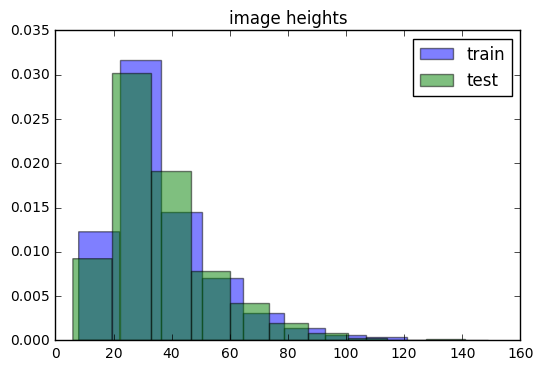

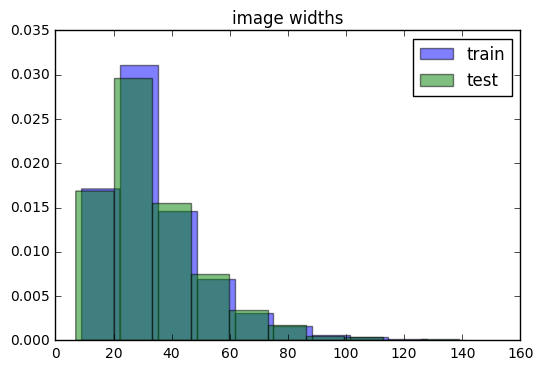

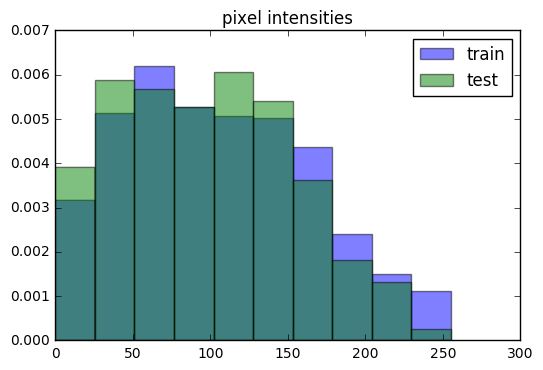

In [28]:
#
# statistics on image size
#
rows_train = [x_train[ii].shape[0] for ii in range(len(x_train))]
cols_train = [x_train[ii].shape[1] for ii in range(len(x_train))]
rows_test = [x_test[ii].shape[0] for ii in range(len(x_test))]
cols_test = [x_test[ii].shape[1] for ii in range(len(x_test))]

print('median # rows, train:', np.median(rows_train))
print('median # rows, test: ', np.median(rows_test))
print('median # cols, train:', np.median(cols_train))
print('median # cols, test: ', np.median(cols_test))

plt.figure()
plt.hist(rows_train, alpha=0.5, label='train', normed=True)
plt.hist(rows_test, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image heights')

plt.figure()
plt.hist(cols_train, alpha=0.5, label='train', normed=True)
plt.hist(cols_test, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image widths')

#
# Pixel intensity values
#
tmp = [x.ravel() for x in x_train]
x_train_flat = np.concatenate(tmp)
print(x_train_flat.shape)

tmp = [x.ravel() for x in x_test]
x_test_flat = np.concatenate(tmp)
print(x_test_flat.shape)

plt.figure()
plt.hist(x_train_flat, alpha=0.5, label='train', normed=True)
plt.hist(x_test_flat, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('pixel intensities')

plt.show()